<a href="https://colab.research.google.com/github/PeterYves/DIC-ML-Assignmnent/blob/main/The_question_of_going_down_Mt_Fuji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Acquisition of elevation data

---



In [3]:
import numpy as np
csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji.shape)
print(fuji[130:140])

(300, 5)
[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


### [Problem 1] Data visualization

---



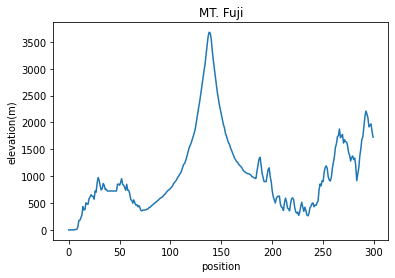

In [4]:
import matplotlib.pyplot as plt
plt.title("MT. Fuji")
plt.xlabel("position")
plt.ylabel("elevation(m)")
plt.plot(fuji[:,0],fuji[:,3])
plt.show()

### [Problem 2] Create a function to calculate the gradient at a certain point

---



In [5]:
def calc_slope(point):
    
    change_in_elevation = fuji[:,0][point] - fuji[:,0][point-1]
    change_in_position = fuji[:,3][point] - fuji[:,3][point-1]
    slope = change_in_position/change_in_elevation
    return slope
print(calc_slope(0))

5.77190635451505


### [Problem 3] Create a function to calculate the destination point

---



In [6]:
def calc_destination(current_point,alpha,slope):
    destination_point = current_point - alpha*slope
    if(destination_point <=0):
        return 0
    else:
        return round(destination_point)
#call the slope
alpha = 0.2
current_point = 0
slope = calc_slope(current_point)
print(calc_destination(current_point,alpha,slope))

0


### [Problem 4] Create a function to go down the mountain

---



In [7]:
def calc_goingdown_mtfuji(current_position_1,alpha_1):
    slope_1 = calc_slope(current_position_1)
    positions = [current_position_1]
    for counter in range(fuji.size):
        current_position_1 = int(calc_destination(current_position_1,alpha_1,slope_1))
        if(positions[-1] == current_position_1):
            break
        else:
            positions.append(current_position_1)
    return positions
alpha_2 = 0.2
print(calc_goingdown_mtfuji(136,alpha_2))

[136, 102, 68, 34, 0]


### [Problem 5] Visualization of the descent process

---



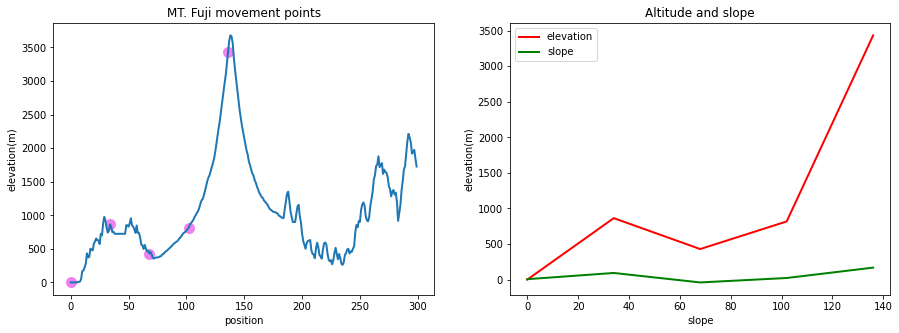

In [20]:
#Display points moved in cross section as dots
positions_array = calc_goingdown_mtfuji(136,alpha_2)

figure = plt.figure(figsize=(15,5))
fig1 = figure.add_subplot(1,2,1)

fig1.set_title("MT. Fuji movement points")
fig1.set_xlabel("position")
fig1.set_ylabel("elevation(m)")
fig1.plot(fuji[:,0],fuji[:,3], linewidth=2)
fig1.scatter(positions_array,[fuji[position_2, 3] for position_2 in positions_array],c="violet",linewidth=5)# c is a short word of color

#Make a line graph of the altitude and slope for each iteration

fig2 = figure.add_subplot(1,2,2)

fig2.set_title("Altitude and slope")
fig2.set_xlabel("slope")
fig2.set_ylabel("elevation(m)")
fig2.plot(positions_array,[fuji[position_2, 3] for position_2 in positions_array],color="red", label="elevation", linewidth=2)
fig2.plot(positions_array,[calc_slope(position_2) for position_2 in positions_array], c="green", label="slope", linewidth=2) # c is a short word of color
fig2.legend()
plt.show()

### [Problem 6] Change of initial value

---



<Figure size 1080x360 with 0 Axes>

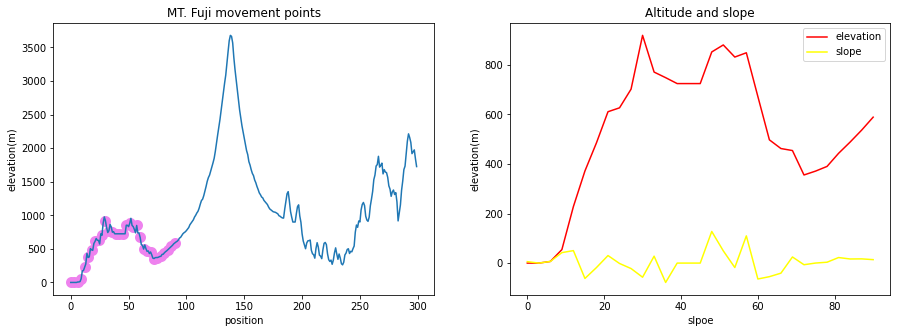

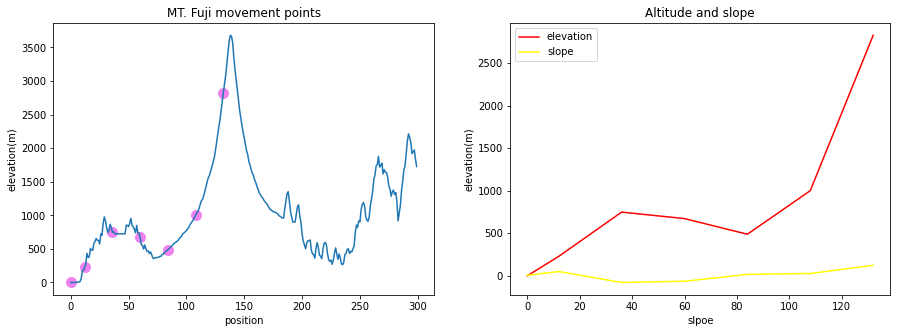

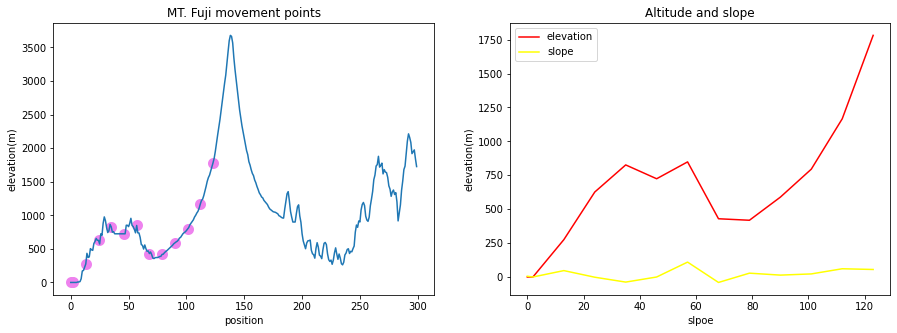

In [25]:
def display_graph_on_given_points(points):
    
    figure = plt.figure(figsize=(15,5))
    alpha_3 = 0.2
    for point_5 in range(points.size):
        
        positions_array_1 = calc_goingdown_mtfuji(points[point_5],alpha_3)
        figure = plt.figure(figsize=(15,5))
        
        fig1 = figure.add_subplot(1,2,1)
        
        fig1.set_title("MT. Fuji movement points")
        fig1.set_xlabel("position")
        fig1.set_ylabel("elevation(m)")
        fig1.plot(fuji[:,0], fuji[:,3])
        fig1.scatter(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="violet", linewidth=5)
        
        #make a line graph of the altitude and slope for each iteration
        
        fig2 = figure.add_subplot(1,2,2)
        
        fig2.set_title("Altitude and slope")
        fig2.set_xlabel("slpoe")
        fig2.set_ylabel("elevation(m)")
        fig2.plot(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="red",label="elevation")
        fig2.plot(positions_array_1,[calc_slope(position_2) for position_2 in positions_array_1],c="yellow",label="slope")
        fig2.legend()
        plt.show()
        
points = np.array([90,132,123])
display_graph_on_given_points(points)


### [Problem 7] Visualization of the descent process for each initial value

---



<Figure size 1080x360 with 0 Axes>

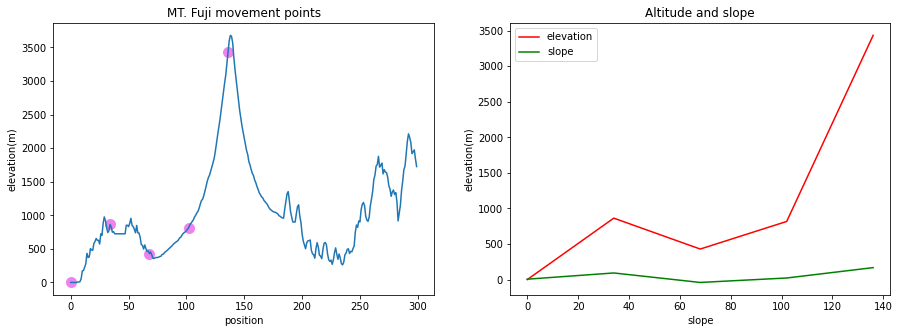

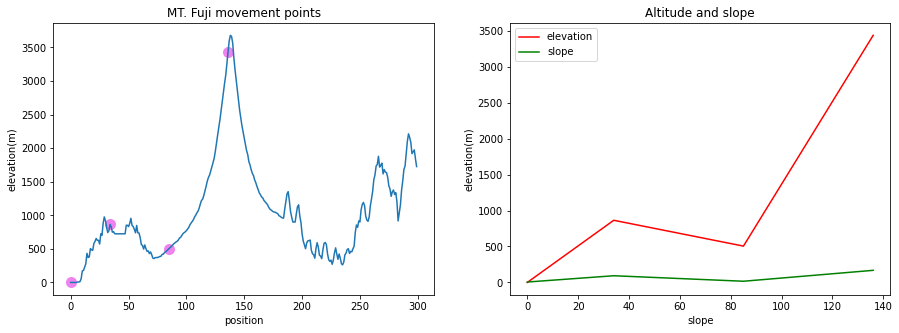

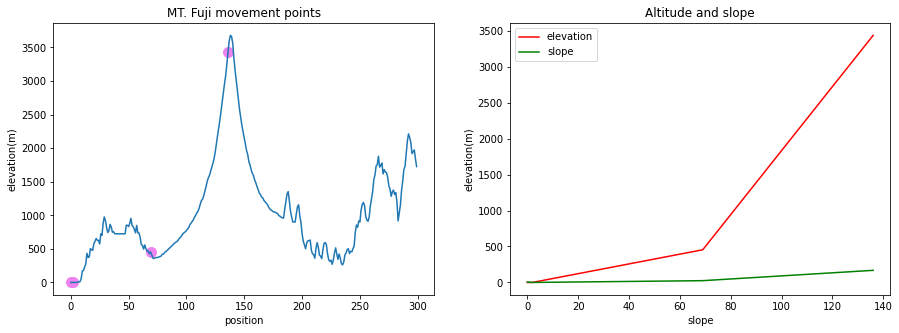

In [24]:
def display_graph_on_given_alpha_points(alphas):
    figure = plt.figure(figsize=(15,5))
    for point_6 in range(alphas.size):
        
        positions_array_1 = calc_goingdown_mtfuji(136,alphas[point_6])
        figure = plt.figure(figsize=(15,5))
        fig1 =figure.add_subplot(1,2,1)
        
        fig1.set_title("MT. Fuji movement points")
        fig1.set_xlabel("position")
        fig1.set_ylabel("elevation(m)")
        fig1.plot(fuji[:,0],fuji[:,3])
        fig1.scatter(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="violet", linewidth=5)
        
        # Make a line graph of the altitude and for each iteration
        
        fig2 = figure.add_subplot(1,2,2)
        
        fig2.set_title("Altitude and slope")
        fig2.set_xlabel("slope")
        fig2.set_ylabel("elevation(m)")
        fig2.plot(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="red",label="elevation")
        fig2.plot(positions_array_1,[calc_slope(position_2) for position_2 in positions_array_1],c="green",label="slope")
        fig2.legend()
        plt.show()
        
alphas_1 = np.array([0.2,0.3,0.4])
display_graph_on_given_alpha_points(alphas_1)